# Examining Sentiment around "Adipurush" on Twitter: Employing Machine Learning to Gain Insights from Social Media Conversations

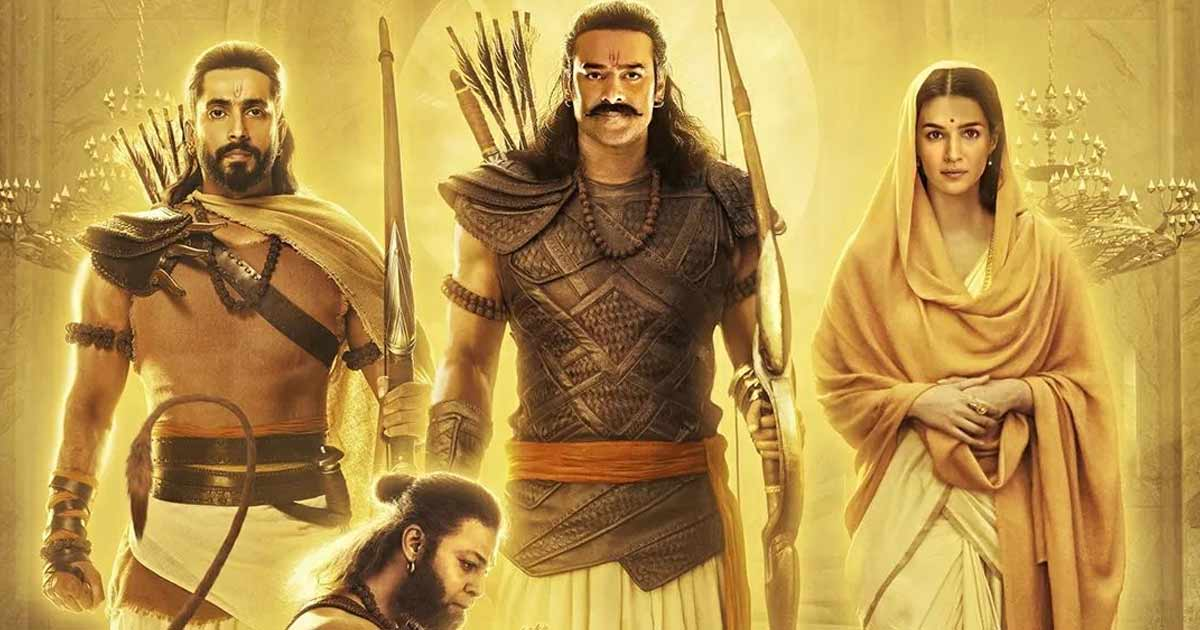

# Importing required Libraries

In [1]:
#remove all the unwanted warnigns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install missingno pandas-summary sweetviz spellchecker langdetect -q
!pip install pyspellchecker==0.5.6 -q

In [3]:
#import all the required libraries
import pandas as pd
from pandas_summary import DataFrameSummary
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go

#nlp libraries
import re
import string
from tqdm.notebook import tqdm
from datetime import datetime
import dateutil.parser
import nltk
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
import random 

# Loading the data and Data Understanding

In [4]:
df = pd.read_csv('/kaggle/input/adipurush-movie-tweets/adipurush_tweets.csv')

In [5]:
top_5_df = df.head(5)
# Create a Styler object with the desired dataframe
top_5_df = top_5_df.style

# Apply colorful styles to the dataframe
top_5_df = top_5_df.background_gradient(cmap='cool')
top_5_df

In [6]:
print('There are {} rows and {} columns in Data'.format(df.shape[0],df.shape[1]))

There are 10001 rows and 3 columns in Data


In [7]:
print('Here is a list of columns in the dataset :{} '.format(df.columns.values))

Here is a list of columns in the dataset :['Date Created' 'Number of Likes' 'Tweets'] 


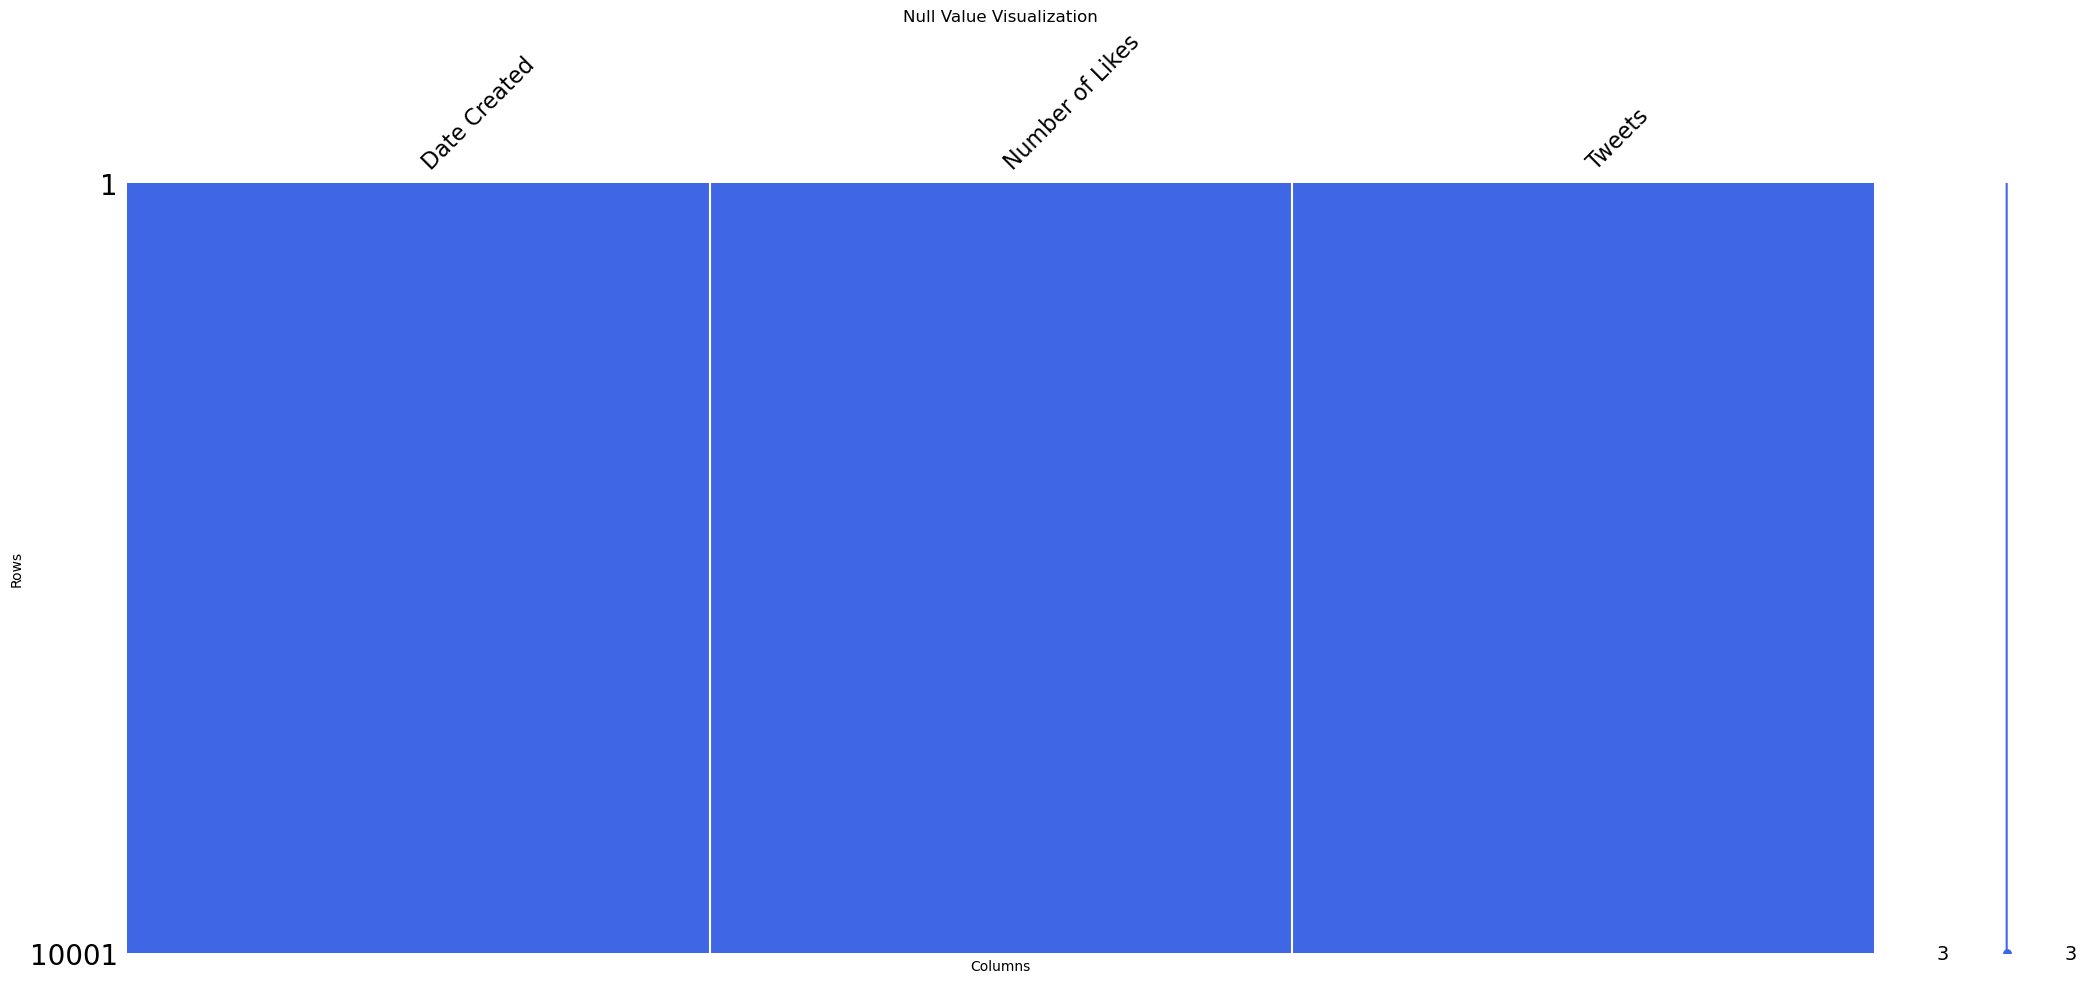

In [8]:
msno.matrix(df, color=(0.25, 0.4, 0.9))  # Specify the color for the missing values

# Customize the plot (optional)
plt.title("Null Value Visualization")
plt.xlabel("Columns")
plt.ylabel("Rows")

# Display the plot
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


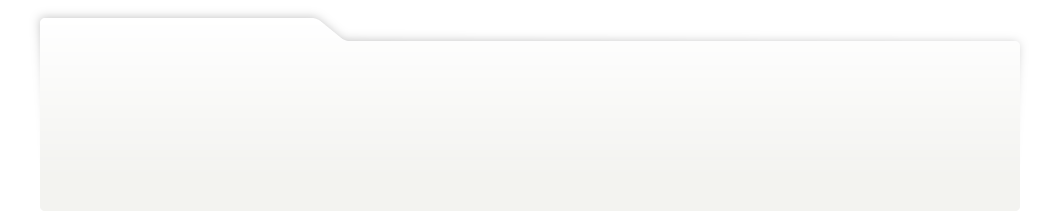
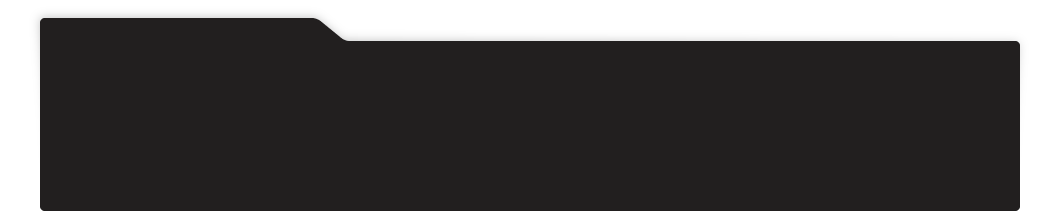
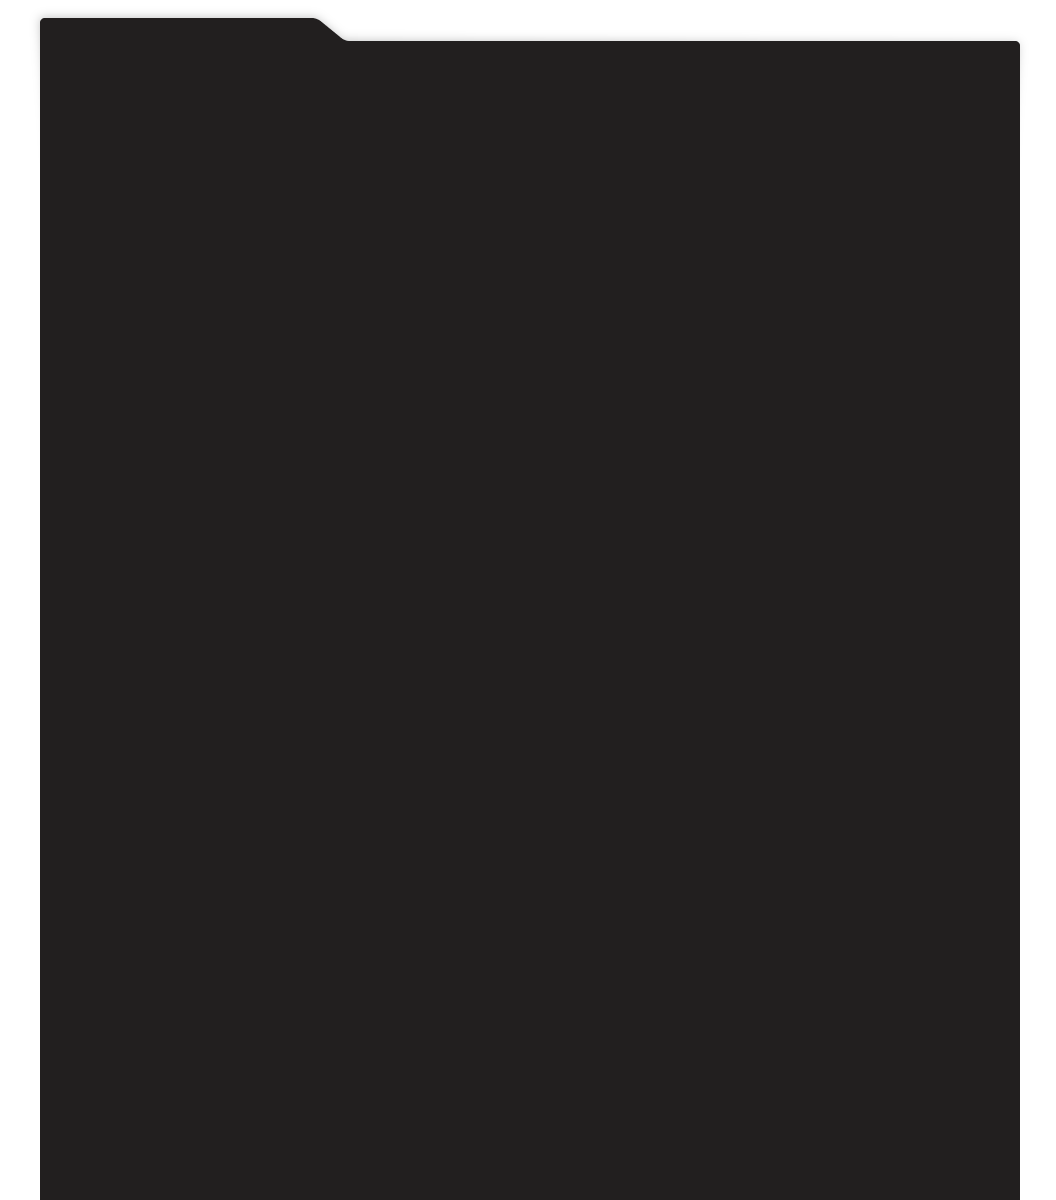
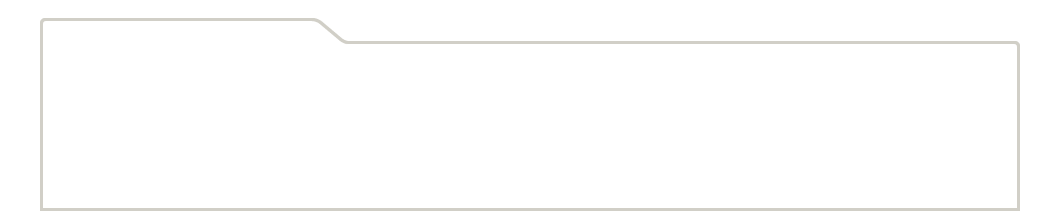
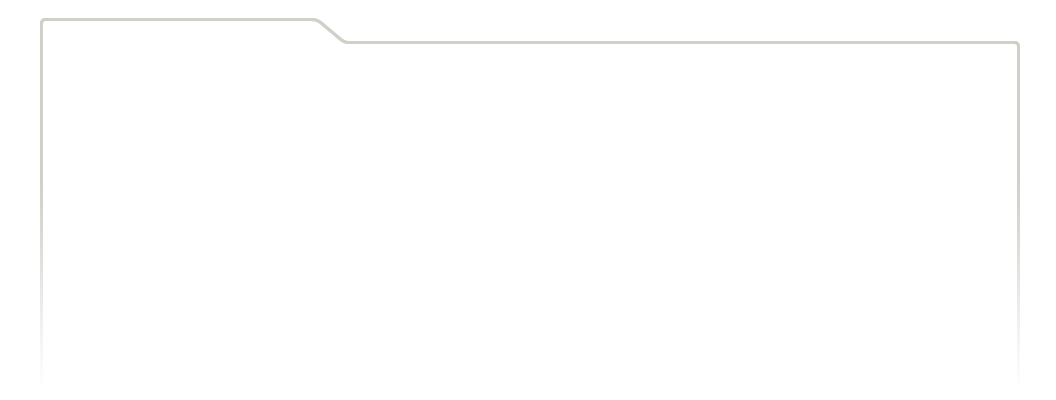
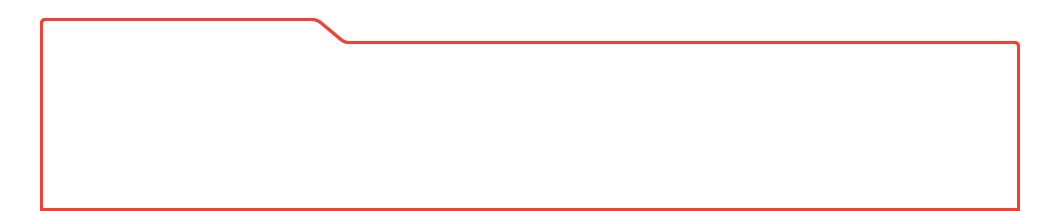
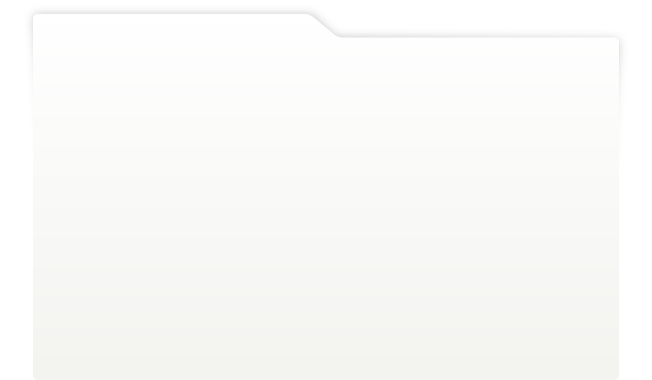
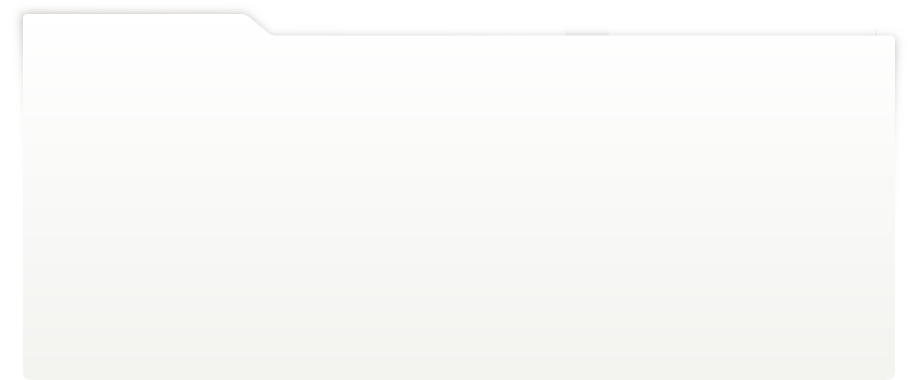
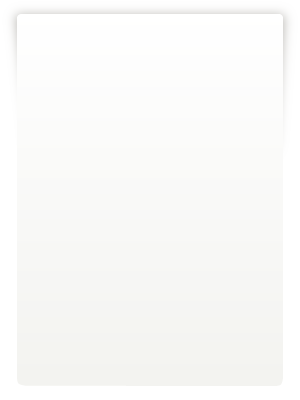
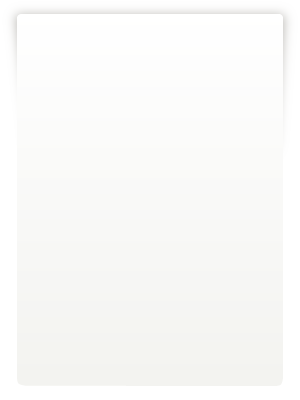
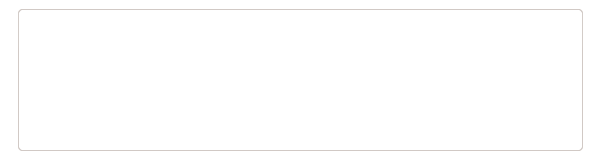
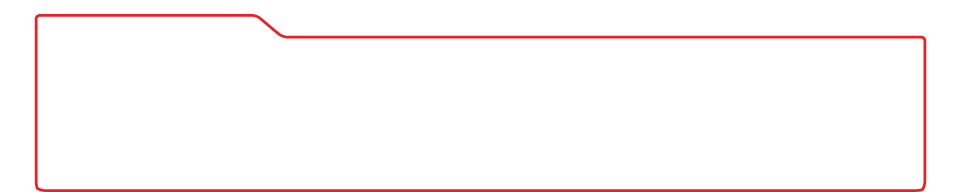
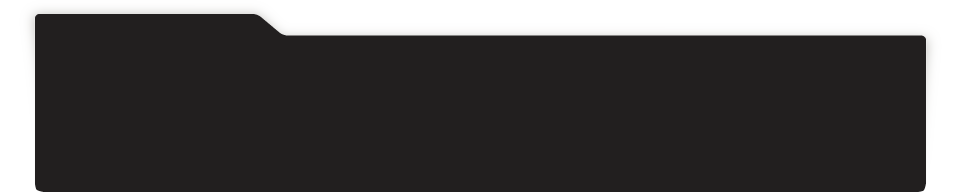
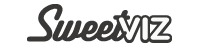
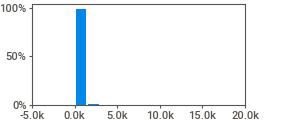
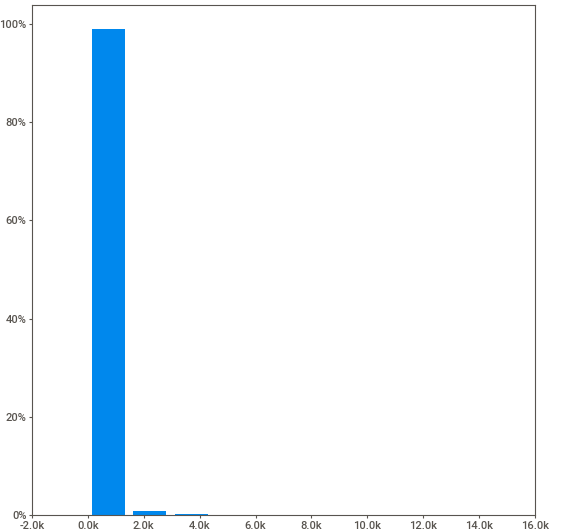
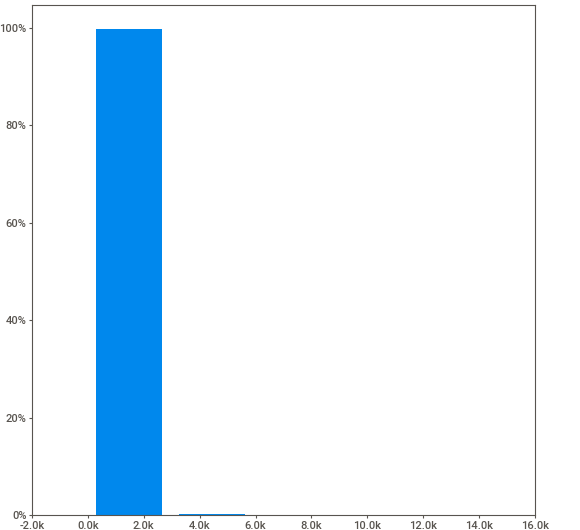
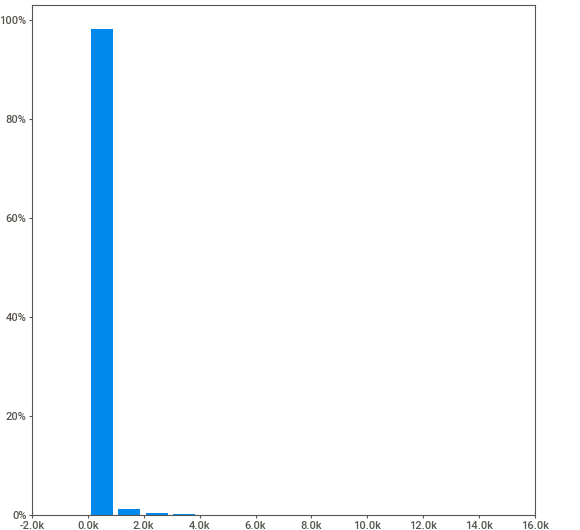
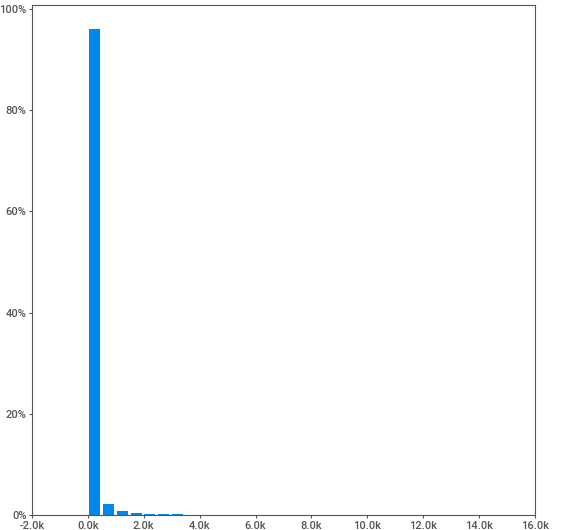
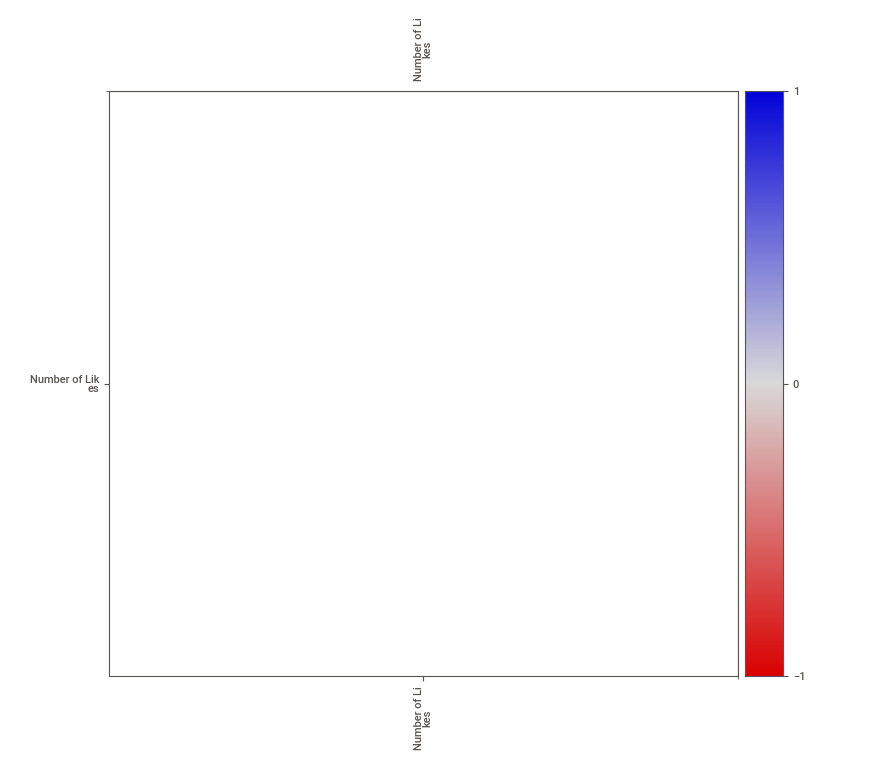
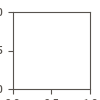

In [9]:
# Create a summary of the dataframe
summary = DataFrameSummary(df)

# Generate an HTML report using sweetviz
report = sv.analyze(df)

# Display the report in the notebook
report.show_notebook()

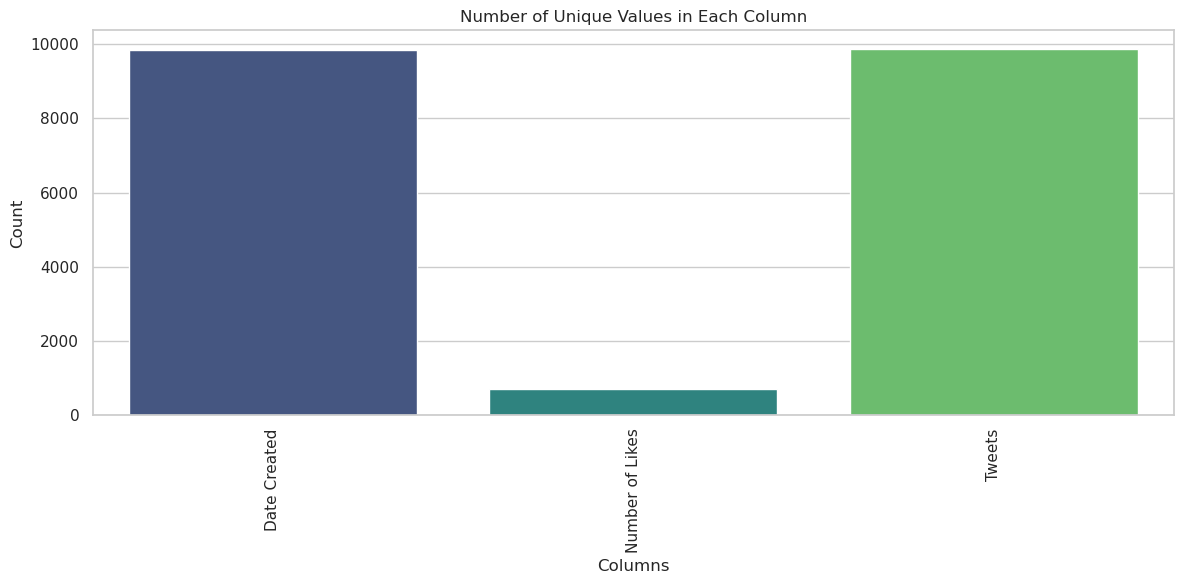

In [10]:

# Calculate the number of unique values in each column
unique_counts = df.nunique()

# Set the style using seaborn
sns.set(style="whitegrid")

# Plot the number of unique values
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")
plt.title("Number of Unique Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
# here we sort this dataset according to the number of likes
df_sorted = df.sort_values(by='Number of Likes', ascending=False)
df_sorted.head(10)

Date Created  Number of Likes  \
5036  2023-06-26 02:51:52+00:00            14778   
2975  2023-06-27 12:35:31+00:00             8266   
8180  2023-06-24 09:10:09+00:00             8112   
3593  2023-06-27 02:23:37+00:00             7010   
6069  2023-06-25 07:20:59+00:00             5580   
3601  2023-06-27 01:59:03+00:00             5149   
4744  2023-06-26 06:20:58+00:00             4912   
4716  2023-06-26 06:30:01+00:00             4788   
5636  2023-06-25 13:08:17+00:00             4741   
1559  2023-06-28 14:40:47+00:00             4561   

                                                 Tweets  
5036  Pan India Star #Prabhas clearly said NO for #A...  
2975  #Breaking: Comments by Allahabad high court to...  
8180  #Adipurush #Prabhas #BhushanKumar https://t.co...  
3593  आदिपुरुष निर्माताओं को लगा एक और झटका, इलाहाबा...  
6069  👉#AdiPurush Telugu Version Hits 100CR SHARE💥💥💥...  
3601  #Adipurush WW BO\n\nZOOMS past ₹4⃣0⃣0⃣ cr.\n\n...  
4744  #Adipurush goes from strength to strength at t...  
4716  We are incredibly touched by the overwhelming ...  
5636  Witness the epic saga unfold!🏹 \nBook your tic...  
1559  कुरान पर गलत तथ्यों के साथ एक छोटी सी डॉक्यूमे...

In [12]:
#convert date_created into object to datetime formate
df['Date Created'] = pd.to_datetime(df['Date Created'])

In [13]:
# Sort the dataframe by 'Date Created'
df_sorted_date = df.sort_values('Date Created')

# Create a line plot using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_sorted_date['Date Created'], y=df_sorted_date['Number of Likes'],
                         mode='lines', name='Number of Likes'))

# Customize the layout
fig.update_layout(title='Number of Likes over Time',
                  xaxis_title='Date Created',
                  yaxis_title='Number of Likes',
                  showlegend=True)

# Display the plot
fig.show()

In [14]:
df.columns

Index(['Date Created', 'Number of Likes', 'Tweets'], dtype='object')

In [15]:
# Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=df['Date Created'],
    y=df['Number of Likes'],
    z=df['Tweets'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['Number of Likes'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Customize the layout
fig.update_layout(
    scene=dict(
        xaxis_title='Date Created',
        yaxis_title='Number of Likes',
        zaxis_title='Number of Comments'
    ),
    title='3D Scatter Plot: Number of Likes vs. Number of Comments over Time'
)

# Display the plot
fig.show()

# Natural Language Processing (NLP) for Text Analysis

In [16]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
languages = stopwords.fileids()

# Print the number of supported languages
print("Number of supported languages:", len(languages))

# Print the list of supported languages
print("Supported languages:", languages)

Number of supported languages: 29
Supported languages: ['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [18]:
from nltk.tokenize import TweetTokenizer

In [19]:
english_stopwords = stopwords.words('english')
hinglish_stopwords = stopwords.words('hinglish')

In [20]:
def clean_tweet(tweet):
    # Remove URLs, hashtags, mentions, and special characters
    tweet = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)

    # Tokenize the tweet
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tokens = tokenizer.tokenize(tweet)

    # Remove stopwords for English and Hinglish
    tokens = [token for token in tokens if token not in english_stopwords and token not in hinglish_stopwords]

    # Remove punctuation and convert to lowercase
    tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens]
    tokens = [token.lower() for token in tokens]

    # Join tokens back into a string
    cleaned_tweet = ' '.join(tokens)

    return cleaned_tweet

In [21]:
#clean tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(clean_tweet)

In [22]:
df.head()

Date Created  Number of Likes  \
0 2023-06-30 09:21:00+00:00                0   
1 2023-06-30 09:20:57+00:00                0   
2 2023-06-30 09:20:22+00:00                0   
3 2023-06-30 09:20:00+00:00                3   
4 2023-06-30 09:15:22+00:00                3   

                                              Tweets  \
0  #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1  Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
2                             @ponilemova #Adipurush   
3  Adipurush VS 72 Hoorain VS The Kerala Story Co...   
4             ST: #Adipurush https://t.co/lsGKcgQuKL   

                                      Cleaned_Tweets  
0  womens ashes 2023 live streaming broadcast tv ...  
1                                playing book ticket  
2                                                     
3  adipurush vs 72 hoorain vs kerala story contro...  
4                                                 st

In [23]:
def clean_text(text):
    text = text.lower() 
    return text.strip()

In [24]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: clean_text(x))

In [25]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

In [26]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: tokenization(x))

In [27]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [28]:
import spacy

# Load the language model
nlp = spacy.load('en_core_web_sm')

In [29]:
def lemmatizer(text):
    # Join the list of words into a string
    text = " ".join(text)
    
    # Apply lemmatization using spaCy
    doc = nlp(text)
    lemm_text = " ".join([token.lemma_ for token in doc])
    
    return lemm_text


In [30]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lemmatizer)

In [31]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [32]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: remove_digits(x))

In [33]:
def remove_digits1(sample_text):
    clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()]) 
    return(clean_text)

In [34]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: remove_digits1(x))

In [35]:
from langdetect import detect

def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None

df['Language'] = df['Cleaned_Tweets'].apply(detect_language)

In [36]:
df.head()

Date Created  Number of Likes  \
0 2023-06-30 09:21:00+00:00                0   
1 2023-06-30 09:20:57+00:00                0   
2 2023-06-30 09:20:22+00:00                0   
3 2023-06-30 09:20:00+00:00                3   
4 2023-06-30 09:15:22+00:00                3   

                                              Tweets  \
0  #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1  Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
2                             @ponilemova #Adipurush   
3  Adipurush VS 72 Hoorain VS The Kerala Story Co...   
4             ST: #Adipurush https://t.co/lsGKcgQuKL   

                                      Cleaned_Tweets Language  
0  women ash live stream broadcast tv channel sch...       en  
1                                   play book ticket       en  
2                                                        None  
3  adipurush vs hoorain vs kerala story controver...       en  
4                                                 st       no

In [37]:
df1 = df.copy()

In [38]:
df1['english_tweets'] = df[df['Language'] == 'en']['Cleaned_Tweets']

In [39]:
df1.head()

Date Created  Number of Likes  \
0 2023-06-30 09:21:00+00:00                0   
1 2023-06-30 09:20:57+00:00                0   
2 2023-06-30 09:20:22+00:00                0   
3 2023-06-30 09:20:00+00:00                3   
4 2023-06-30 09:15:22+00:00                3   

                                              Tweets  \
0  #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1  Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
2                             @ponilemova #Adipurush   
3  Adipurush VS 72 Hoorain VS The Kerala Story Co...   
4             ST: #Adipurush https://t.co/lsGKcgQuKL   

                                      Cleaned_Tweets Language  \
0  women ash live stream broadcast tv channel sch...       en   
1                                   play book ticket       en   
2                                                        None   
3  adipurush vs hoorain vs kerala story controver...       en   
4                                                 st       no   

                                      english_tweets  
0  women ash live stream broadcast tv channel sch...  
1                                   play book ticket  
2                                                NaN  
3  adipurush vs hoorain vs kerala story controver...  
4                                                NaN

In [40]:
#drop na values
df1 = df1.dropna()

In [41]:
df1['Year'] = df1['Date Created'].dt.year
df1['Month'] = df1['Date Created'].dt.month
df1['Day'] = df1['Date Created'].dt.day

In [42]:
df1.head()

Date Created  Number of Likes  \
0 2023-06-30 09:21:00+00:00                0   
1 2023-06-30 09:20:57+00:00                0   
3 2023-06-30 09:20:00+00:00                3   
5 2023-06-30 09:08:27+00:00                1   
8 2023-06-30 09:04:09+00:00                0   

                                              Tweets  \
0  #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1  Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3  Adipurush VS 72 Hoorain VS The Kerala Story Co...   
5  This is how the story should be told. @omraut ...   
8  @VikasAgarwalll Milord says: If my compatriots...   

                                      Cleaned_Tweets Language  \
0  women ash live stream broadcast tv channel sch...       en   
1                                   play book ticket       en   
3  adipurush vs hoorain vs kerala story controver...       en   
5  story tell learn hotstar india graphic india g...       en   
8  milord compatriot backstab ie end expose facto...       en   

                                      english_tweets  Year  Month  Day  
0  women ash live stream broadcast tv channel sch...  2023      6   30  
1                                   play book ticket  2023      6   30  
3  adipurush vs hoorain vs kerala story controver...  2023      6   30  
5  story tell learn hotstar india graphic india g...  2023      6   30  
8  milord compatriot backstab ie end expose facto...  2023      6   30

In [43]:
df1.nunique()

Date Created       4771
Number of Likes     546
Tweets             4756
Cleaned_Tweets     4196
Language              1
english_tweets     4196
Year                  1
Month                 1
Day                   8
dtype: int64

In [44]:
df1['Time'] = df1['Date Created'].dt.time

In [45]:
df1['Tweet_Length'] = df1['english_tweets'].str.len()

In [46]:
fig = go.Figure(data=[go.Bar(x=df1['Day'].value_counts().index, y=df1['Day'].value_counts())])
fig.update_layout(
        title= 'Day',
        xaxis_title="Categories",
        yaxis_title="Count"
    )
fig.show()

In [47]:
counts = df1['Day'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Day')
fig.show()

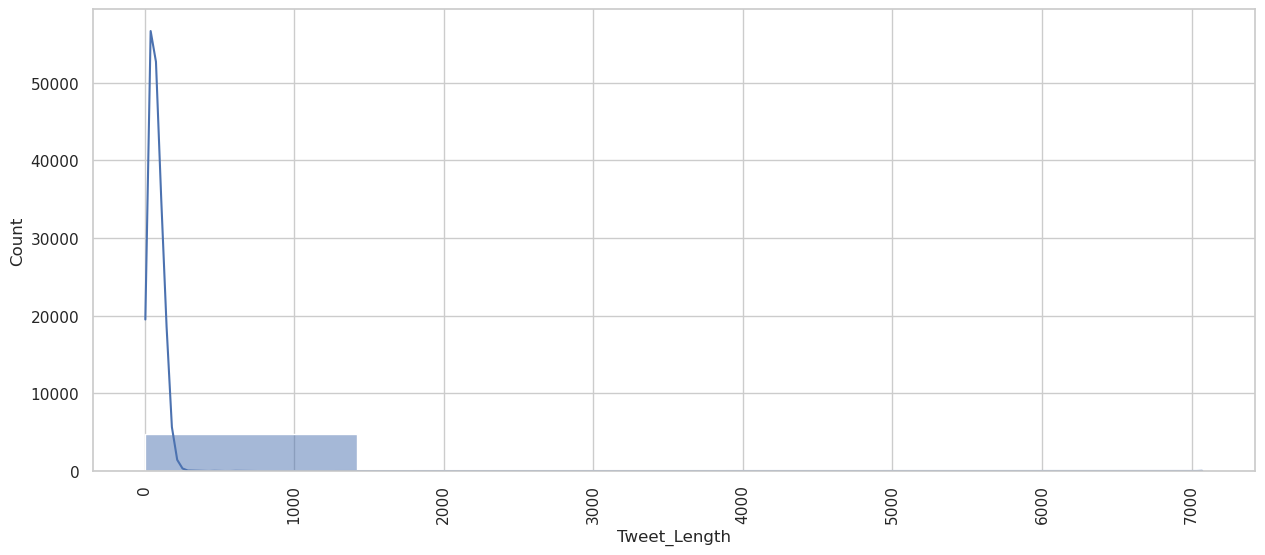

In [48]:
plt.figure(figsize=(15,6))
sns.histplot(df1['Tweet_Length'], kde = True, bins = 5, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [49]:
import plotly.express as px

fig = px.histogram(df1, x='Tweet_Length', nbins=20, histnorm='probability density')
fig.update_layout(title=f"Histogram of Tweet Length", xaxis_title='Tweet Length', yaxis_title="Probability Density")
fig.show()

In [50]:
fig = px.box(df1, y='Tweet_Length')
fig.update_layout(title="Box Plot of Tweet Length", yaxis_title='Tweet Length')
fig.show()

In [51]:
spell = SpellChecker()

In [52]:
def label_sentiment(x:float):
    if x < -0.05 : return 'negative'
    if x > 0.35 : return 'positive'
    return 'neutral'

In [53]:
sia = SIA()

In [54]:
df1['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(df1['english_tweets'])]
df1['overall_sentiment'] = df1['sentiment'].apply(label_sentiment);

  0%|          | 0/4801 [00:00<?, ?it/s]

In [55]:
df1.head()

Date Created  Number of Likes  \
0 2023-06-30 09:21:00+00:00                0   
1 2023-06-30 09:20:57+00:00                0   
3 2023-06-30 09:20:00+00:00                3   
5 2023-06-30 09:08:27+00:00                1   
8 2023-06-30 09:04:09+00:00                0   

                                              Tweets  \
0  #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1  Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3  Adipurush VS 72 Hoorain VS The Kerala Story Co...   
5  This is how the story should be told. @omraut ...   
8  @VikasAgarwalll Milord says: If my compatriots...   

                                      Cleaned_Tweets Language  \
0  women ash live stream broadcast tv channel sch...       en   
1                                   play book ticket       en   
3  adipurush vs hoorain vs kerala story controver...       en   
5  story tell learn hotstar india graphic india g...       en   
8  milord compatriot backstab ie end expose facto...       en   

                                      english_tweets  Year  Month  Day  \
0  women ash live stream broadcast tv channel sch...  2023      6   30   
1                                   play book ticket  2023      6   30   
3  adipurush vs hoorain vs kerala story controver...  2023      6   30   
5  story tell learn hotstar india graphic india g...  2023      6   30   
8  milord compatriot backstab ie end expose facto...  2023      6   30   

       Time  Tweet_Length  sentiment overall_sentiment  
0  09:21:00            57     0.0000           neutral  
1  09:20:57            16     0.3400           neutral  
3  09:20:00            54     0.0000           neutral  
5  09:08:27           113     0.0000           neutral  
8  09:04:09           110     0.5859          positive

In [56]:
df1['overall_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [57]:
df1['overall_sentiment'].value_counts()

neutral     1790
negative    1720
positive    1291
Name: overall_sentiment, dtype: int64

In [58]:
import plotly.express as px

fig = px.histogram(df1, x='overall_sentiment', title='Count Plot of Overall Sentiment')
fig.update_layout(xaxis_title='Overall Sentiment', yaxis_title='Count')
fig.show()


In [59]:
label_data = df1['overall_sentiment'].value_counts()

fig = px.pie(label_data, values=label_data.values, names=label_data.index,
             color_discrete_sequence=['blue', 'red', 'green'],
             hole=0.4,
             labels={'label_data': 'Sentiment'},
             title='Sentiment Distribution')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5),
                  font=dict(family='serif', size=15),
                  title_font=dict(family='serif', size=20))

fig.show()


In [60]:
df2 = df1[['english_tweets', 'overall_sentiment']]

In [61]:
df2.head()

english_tweets overall_sentiment
0  women ash live stream broadcast tv channel sch...           neutral
1                                   play book ticket           neutral
3  adipurush vs hoorain vs kerala story controver...           neutral
5  story tell learn hotstar india graphic india g...           neutral
8  milord compatriot backstab ie end expose facto...          positive

In [62]:
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Remove extra white spaces
    cleaned_text = re.sub('\s+', ' ', cleaned_text).strip()
    # Split the text into words
    words = cleaned_text.split()
    # Join the words back into a string
    cleaned_text = ' '.join(words)
    return cleaned_text

# Apply the clean_text function to the 'english_tweets' column
df2['Cleaned_English_Tweets'] = df2['english_tweets'].apply(clean_text)

In [63]:
df3 = df2[['Cleaned_English_Tweets', 'overall_sentiment']]

In [64]:
df3.head()

Cleaned_English_Tweets overall_sentiment
0  women ash live stream broadcast tv channel sch...           neutral
1                                   play book ticket           neutral
3  adipurush vs hoorain vs kerala story controver...           neutral
5  story tell learn hotstar india graphic india g...           neutral
8  milord compatriot backstab ie end expose facto...          positive

In [65]:
non_meaningful_words = ['cr', 'amp', 'rs', 'u', 'l']

def remove_non_meaningful_words(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in non_meaningful_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df3['Cleaned_English_Tweets'] = df3['Cleaned_English_Tweets'].apply(remove_non_meaningful_words)

# Wordclouds

In [66]:
import wordcloud

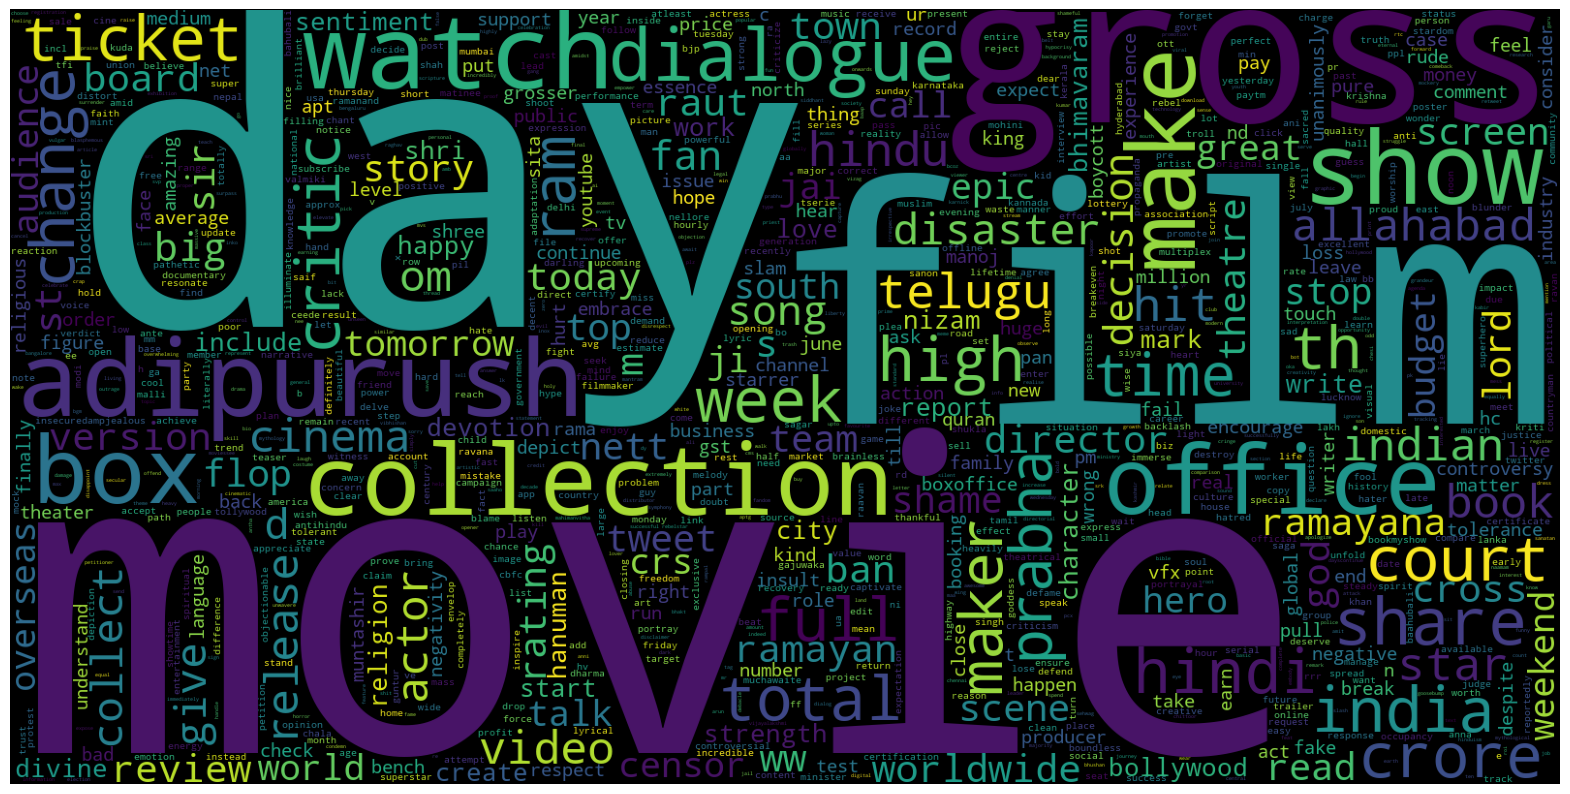

In [67]:
from wordcloud import WordCloud
data = df3['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

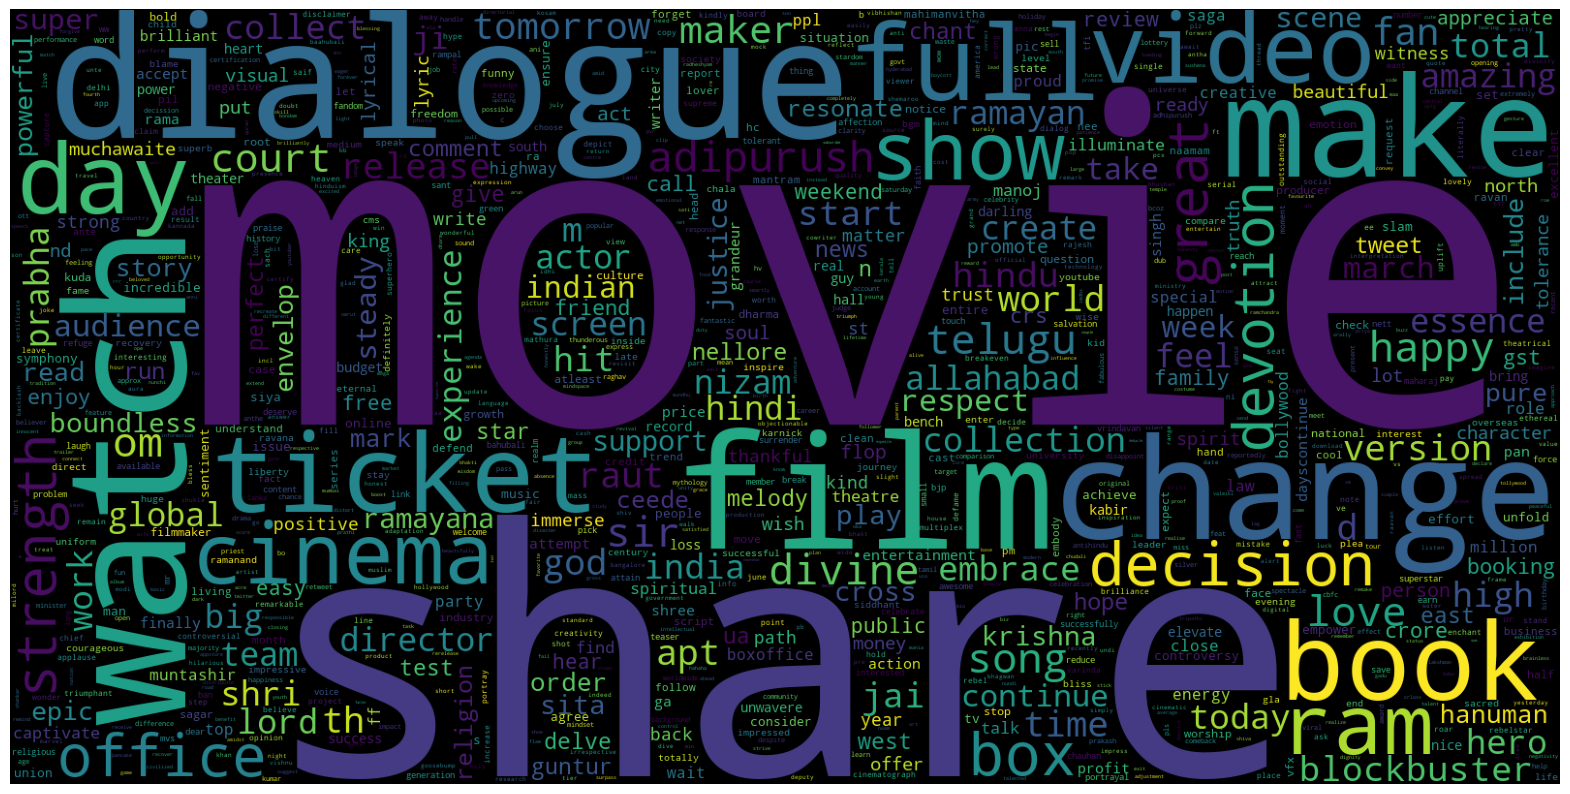

In [68]:
data = df3[df3['overall_sentiment']=="positive"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

from PIL import Image
import numpy as np
data = df3[df3['overall_sentiment'] == "positive"]['Cleaned_English_Tweets']
text = " ".join(data)
wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(text)
image = wordcloud.to_image()
image_array = np.array(image)
fig = go.Figure(data=go.Image(z=image_array))
fig.update_layout(title_text="Word Cloud - Positive Tweets", width=800, height=600)
fig.show()

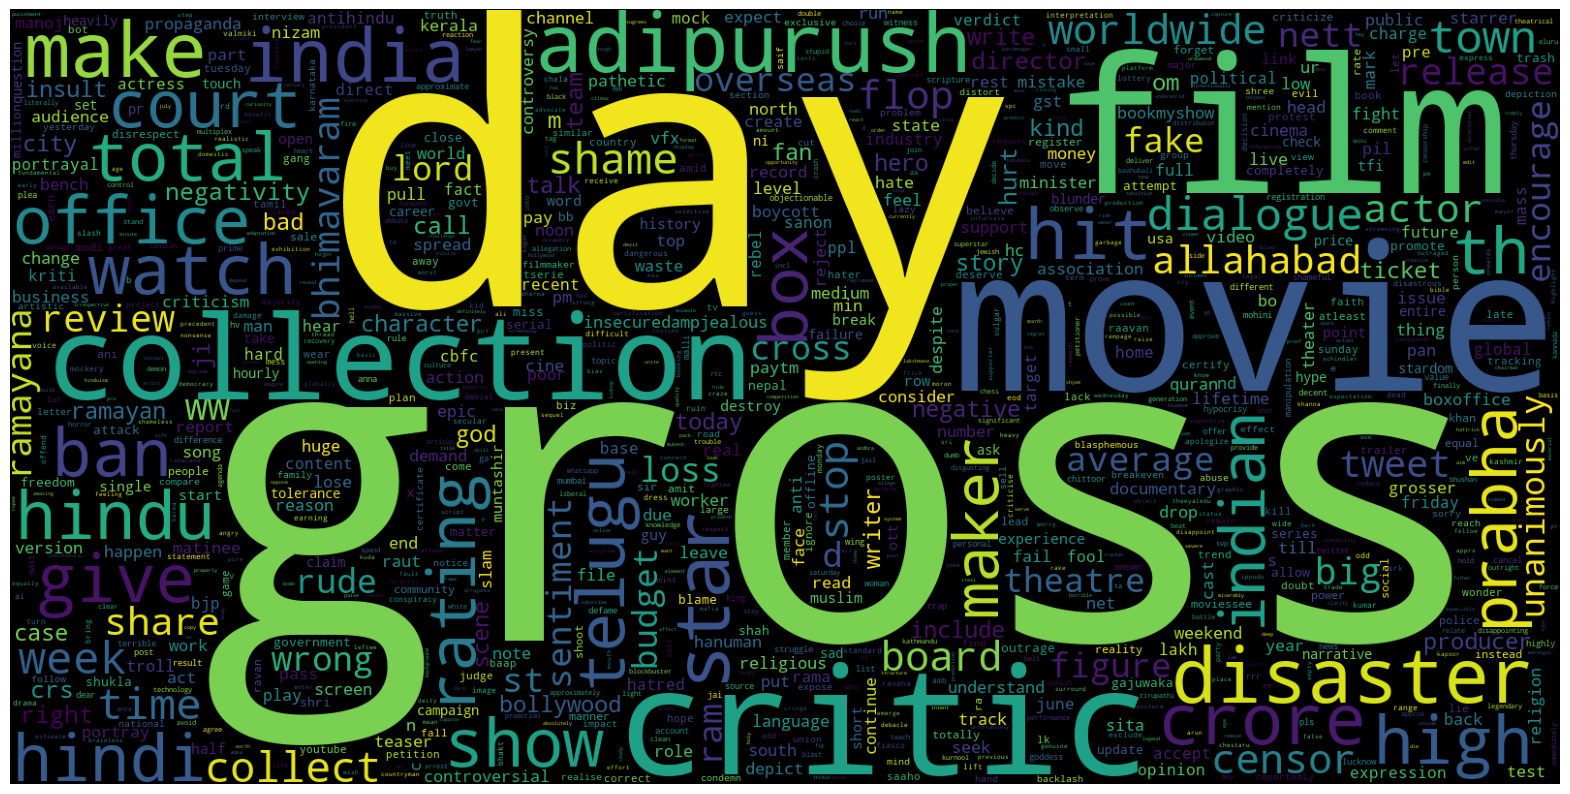

In [69]:
data = df3[df3['overall_sentiment']=="negative"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

from PIL import Image
import numpy as np
data = df3[df3['overall_sentiment'] == "negative"]['Cleaned_English_Tweets']
text = " ".join(data)
wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(text)
image = wordcloud.to_image()
image_array = np.array(image)
fig = go.Figure(data=go.Image(z=image_array))
fig.update_layout(title_text="Word Cloud - Negative Tweets", width=800, height=600)
fig.show()

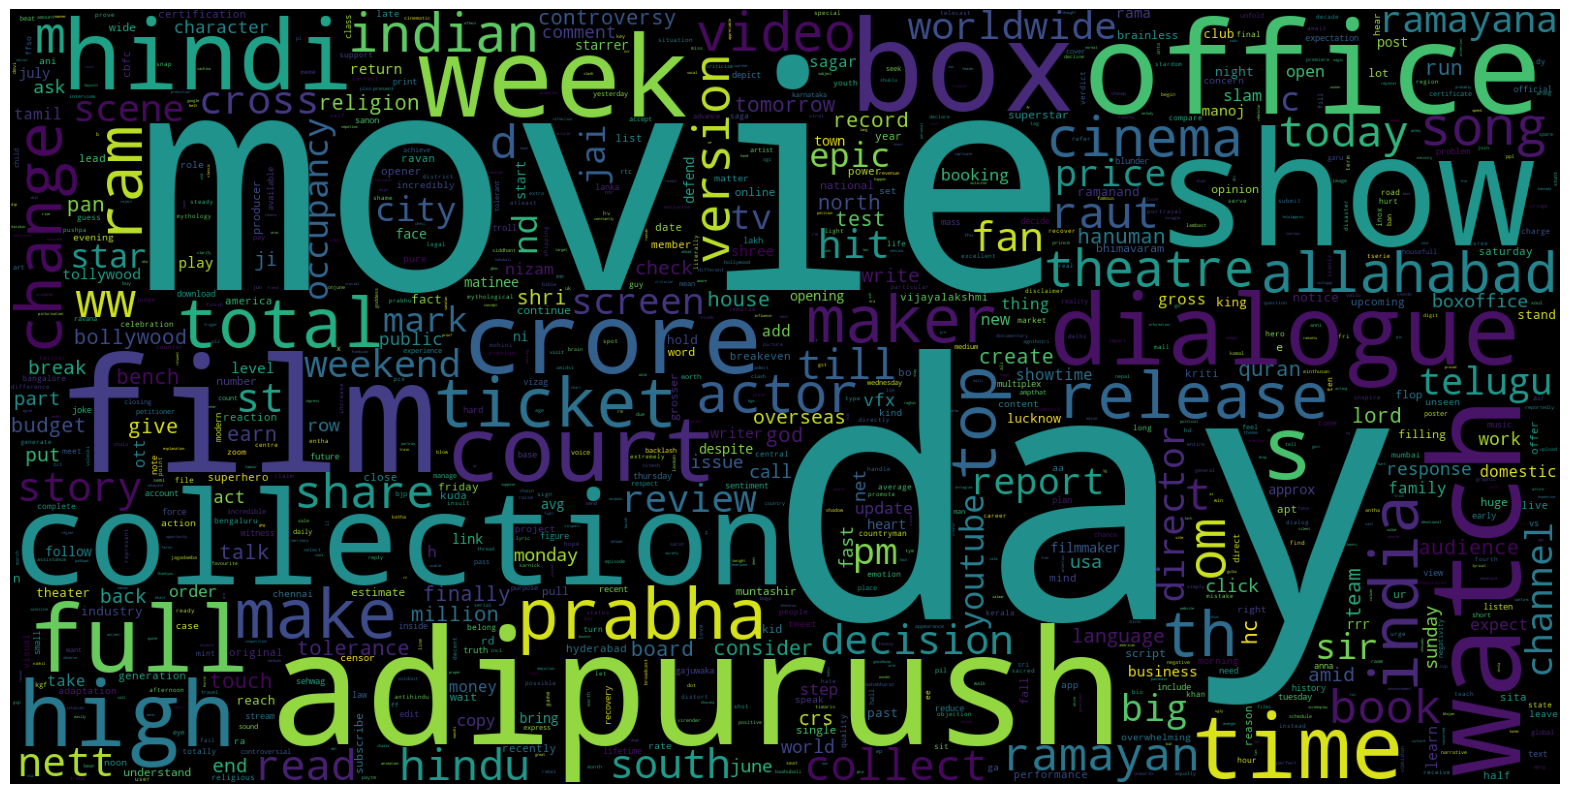

In [70]:
data = df3[df3['overall_sentiment']=="neutral"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

import numpy as np
data = df3[df3['overall_sentiment'] == "neutral"]['Cleaned_English_Tweets']
text = " ".join(data)
wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(text)
image = wordcloud.to_image()
image_array = np.array(image)
fig = go.Figure(data=go.Image(z=image_array))
fig.update_layout(title_text="Word Cloud - Neutral Tweets", width=800, height=600)
fig.show()

In [71]:
x = df3['Cleaned_English_Tweets']
y = df3['overall_sentiment']

print(len(x), len(y))

4801 4801


# Model Designing

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

3600 3600
1201 1201


In [73]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [74]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [75]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)

In [76]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<3600x6548 sparse matrix of type '<class 'numpy.float64'>'
	with 35538 stored elements in Compressed Sparse Row format>

In [77]:
texts = df3['Cleaned_English_Tweets']
target = df3['overall_sentiment']

In [78]:
from keras.preprocessing.text import Tokenizer

In [79]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

7974

In [80]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize

In [81]:
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts), 
    length_long_sentence, 
    padding='post'
)

train_padded_sentences

array([[1959, 1960,  216, ...,    0,    0,    0],
       [ 155,   32,   16, ...,    0,    0,    0],
       [   5,  485, 1652, ...,    0,    0,    0],
       ...,
       [ 834,  483,  726, ...,    0,    0,    0],
       [ 838, 1394, 1018, ...,    0,    0,    0],
       [   3,   85,   90, ...,    0,    0,    0]], dtype=int32)

In [82]:
import numpy as np

In [83]:
embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings
with open('/kaggle/input/glove6b100dtxt/glove.6B.100d.txt', encoding="utf8") as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

# Naive Bayes

In [84]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

In [85]:
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [86]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7227310574521232


In [87]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

In [88]:
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

0.7177352206494588


In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# XGBoost

In [92]:
import xgboost as xgb

pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
    ))
])

In [93]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='auc',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=80,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [94]:
y_pred = pipe.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc)

Test accuracy: 0.7211238293444329


# Thank you 

* If you find this helpful, I would really appreciate the upvote!

* If you see something wrong please let me know.

* And lastly Im happy to hear your thoughts about the notebook for me to also improve!